# Project 2 DA using Scikit_learn Coding Internship 

## Topic: Recognizing Handwritten Digits with scikit-learn

## Problem Definition


Recognizing handwritten text is a problem that can be traced back to the first automatic machines that needed to recognize individual characters in handwritten documents.To address this issue in Python, the scikit-learn library provides a good example to better understand this technique, the issues involved, and the possibility of making predictions.Here we are predicting a numeric value, and then reading and interpreting an image that uses a handwritten font.

### Import the model

In [1]:
from sklearn import svm

### Creating Instance

In [2]:
svc = svm.SVC(gamma=0.001, C=100.)

### Load Dataset

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

## Data Extraction

In [4]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Data preparation - Data transformation

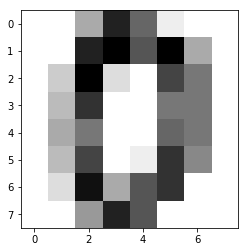

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')


## Data Preparation - Analyze & split

In [7]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [8]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
digits.images.shape

(1797, 8, 8)

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
digits.target.shape

(1797,)

In [12]:
digits.target.size

1797

### Data Visualization

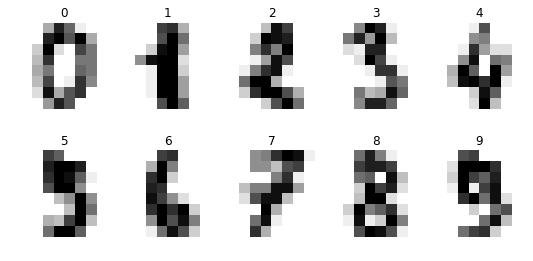

In [13]:
def plot_multi(i):
    #'''Plots 10 digits, starting with digit i'''
    nplots = 10
    fig = plt.figure(figsize=(9,9))
    for j in range(nplots):
        plt.subplot(4,5,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()
plot_multi(0)

### Case 1: 

### Range of training set: [401:1790] & validation set: [1791:1796] 

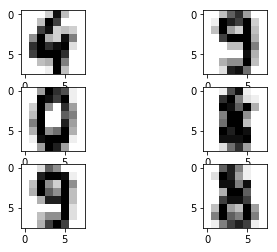

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')

### Case 2:

### Range of training set: [321:800] & validation set: [801:806] 

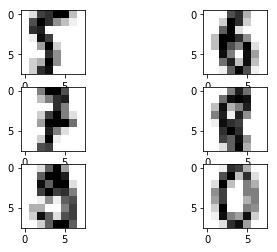

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(321)
plt.imshow(digits.images[801], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[802], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[803], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[804], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[805], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[806], cmap=plt.cm.gray_r, interpolation='nearest')

### Case 3:

### Range of training set: [1:260] & validation set: [261:266] 

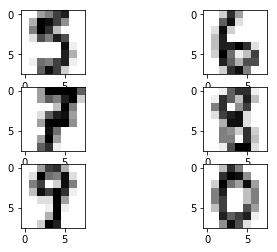

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(321)
plt.imshow(digits.images[261], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[262], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[263], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[264], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[265], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[266], cmap=plt.cm.gray_r, interpolation='nearest')

## Training the instance

### Case 1:

In [17]:
svc.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Case 2:

In [18]:
svc.fit(digits.data[321:800], digits.target[321:800])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Case 3:

In [19]:
svc.fit(digits.data[1:260], digits.target[1:260])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Train-test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

In [23]:
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

## Model validation/test

### Case 1:

In [24]:
svc.predict(digits.data[1791:1797])

array([4, 9, 0, 8, 9, 8])

In [25]:
digits.target[1791:1797]

array([4, 9, 0, 8, 9, 8])

### Case 2:

In [26]:
svc.predict(digits.data[801:806])

array([5, 6, 7, 8, 9])

In [27]:
digits.target[801:806]

array([5, 6, 7, 8, 9])

### Case 3:

In [28]:
svc.predict(digits.data[261:266])

array([5, 6, 7, 8, 9])

In [29]:
digits.target[261:266]

array([5, 6, 7, 8, 9])

### Accuracy

In [30]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
print(accuracy)

99.33333333333333


## Deploy - Visualization and Interpretation of results

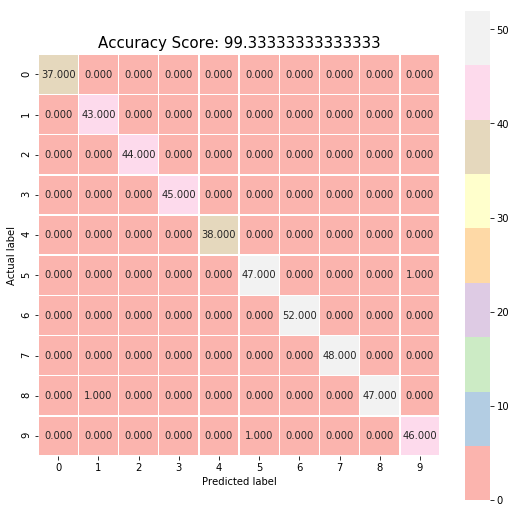

In [32]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);


The svc estimator has learned correctly. It is able to recognize the handwritten digits, interpreting more or less correctly all six digits of the validation set.


On choosing a smaller training set and different range for validation, I analyzed that

#### Case 1: We have got 100% accurate prediction 

#### Case 2: We have got 100% accurate prediction 

#### Case 3: We have got 95% accurate prediction